In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Data Collection.
# Loading data to dataframe of pandas
airline_df = pd.read_csv("BA_AirlineReviews.csv")
airline_df.head()

,Unnamed: 0,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,0,1.0,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,November 2023,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN
1,1,3.0,"""do not upgrade members based on status""",Austin Jones,19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,November 2023,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2.0
2,2,8.0,"""Flight was smooth and quick""",M A Collie,16th November 2023,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,November 2023,3.0,3.0,4.0,3.0,yes,A320,4.0,NaN,NaN
3,3,1.0,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,December 2022,3.0,3.0,1.0,1.0,no,NaN,NaN,NaN,NaN
4,4,1.0,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,November 2023,1.0,1.0,1.0,1.0,no,NaN,1.0,1.0,1.0


In [3]:
#Data Preprocessing and Cleaning.

#Check missing values.
airline_df.isnull().sum()

Unnamed: 0                  0
OverallRating               5
ReviewHeader                0
Name                        0
Datetime                    0
VerifiedReview              0
ReviewBody                  0
TypeOfTraveller           771
SeatType                    2
Route                     775
DateFlown                 778
SeatComfort               116
CabinStaffService         127
GroundService             846
ValueForMoney               1
Recommended                 0
Aircraft                 1779
Food&Beverages            386
InflightEntertainment    1150
Wifi&Connectivity        3092
dtype: int64

In [4]:
#Drop redundant columns.
# 'Unnamed: 0' column is index data, so it is not necessary.
# Also 'Wifi&Connectivity' is missing a large amount of data, calculating with this varaible may cause errors or inaccuracies.
redundantColumns = ["Unnamed: 0", "Aircraft", "Wifi&Connectivity", "DateFlown", "Route"]
airline_df.drop(redundantColumns, axis= 1, inplace = True)

In [5]:
airline_df.isnull().sum()

OverallRating               5
ReviewHeader                0
Name                        0
Datetime                    0
VerifiedReview              0
ReviewBody                  0
TypeOfTraveller           771
SeatType                    2
SeatComfort               116
CabinStaffService         127
GroundService             846
ValueForMoney               1
Recommended                 0
Food&Beverages            386
InflightEntertainment    1150
dtype: int64

In [6]:
# Encode yes/no and True/False variables to binary form.
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
airline_df["Recommended"] = label_encoder.fit_transform(airline_df["Recommended"])
airline_df["VerifiedReview"] = label_encoder.fit_transform(airline_df["VerifiedReview"])

In [7]:
# Change ordinal variables to numerical variables.
# The ranking was based on the price to be paid for seats.
mapping = {"Family Leisure": 0, "Couple Leisure": 1, "Solo Leisure": 2, "Business": 3}
airline_df["TypeOfTraveller"] = airline_df["TypeOfTraveller"].map(mapping)
mapping = {"Economy Class": 0, "Business Class": 1}
airline_df["SeatType"] = airline_df["SeatType"].map(mapping)

In [8]:
airline_df.head()

,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Food&Beverages,InflightEntertainment
0,1.0,"""Service level far worse then Ryanair""",L Keele,19th November 2023,1,4 Hours before takeoff we received a Mail stat...,1.0,0.0,1.0,1.0,1.0,1.0,0,NaN,NaN
1,3.0,"""do not upgrade members based on status""",Austin Jones,19th November 2023,1,I recently had a delay on British Airways from...,3.0,0.0,2.0,3.0,1.0,2.0,0,1.0,2.0
2,8.0,"""Flight was smooth and quick""",M A Collie,16th November 2023,0,"Boarded on time, but it took ages to get to th...",1.0,1.0,3.0,3.0,4.0,3.0,1,4.0,NaN
3,1.0,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,1,"5 days before the flight, we were advised by B...",1.0,0.0,3.0,3.0,1.0,1.0,0,NaN,NaN
4,1.0,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,0,"We traveled to Lisbon for our dream vacation, ...",1.0,0.0,1.0,1.0,1.0,1.0,0,1.0,1.0


In [9]:
# Mode imputation for missing variables with no more than 500 missing values
airline_df["SeatType"] = airline_df["SeatType"].fillna(airline_df["SeatType"].mode()[0])
airline_df["OverallRating"] = airline_df["OverallRating"].fillna(airline_df["OverallRating"].mode()[0])
airline_df["SeatComfort"] = airline_df["SeatComfort"].fillna(airline_df["SeatComfort"].mode()[0])
airline_df["CabinStaffService"] = airline_df["CabinStaffService"].fillna(airline_df["CabinStaffService"].mode()[0])
airline_df["ValueForMoney"] = airline_df["ValueForMoney"].fillna(airline_df["ValueForMoney"].mode()[0])

In [10]:
# Copy airline_df to new dataframe to make KNN classifier without changing original dataframe.
knn_imputation_df = airline_df.copy()
redundantColumns = ["ReviewHeader", "Name", "Datetime", "ReviewBody"]
knn_imputation_df = knn_imputation_df.drop(redundantColumns, axis = 1)

In [11]:
# KNN classifier imputation for missing variables with more than 500 missing values
from sklearn.neighbors import KNeighborsClassifier

# The function to apply imputation for necessary variables
def fillMissingColumn(df, targetCol):
    columnsToDrop = ["TypeOfTraveller", "GroundService", "Food&Beverages", "InflightEntertainment"]
    columnsToDrop = [col for col in columnsToDrop if col != targetCol]
    new_df = df.drop(columnsToDrop, axis = 1)
    df_missing = new_df[new_df[targetCol].isnull()]
    df_not_missing = new_df.dropna(subset=targetCol)

    x_train = df_not_missing.drop(targetCol, axis = 1)
    y_train = df_not_missing[targetCol]
    x_test = df_missing.drop(targetCol, axis = 1)
    knn_classifier = KNeighborsClassifier(n_neighbors=5)
    knn_classifier.fit(x_train, y_train)  
    missing_predictions = knn_classifier.predict(x_test)
    df.loc[df[targetCol].isnull(), targetCol] = missing_predictions
    
# Loop to impute missing features.
columnsToFill = ["TypeOfTraveller", "GroundService", "Food&Beverages", "InflightEntertainment"]
for col in columnsToFill:
    if (airline_df[col].isnull().sum() == 0):
        continue
    fillMissingColumn(knn_imputation_df, col)
    airline_df[col] = knn_imputation_df[col]
    
#Imputed all missing values.    
airline_df.isnull().sum()
# Outliers weren't considered, because all columns are categorical variable.

OverallRating            0
ReviewHeader             0
Name                     0
Datetime                 0
VerifiedReview           0
ReviewBody               0
TypeOfTraveller          0
SeatType                 0
SeatComfort              0
CabinStaffService        0
GroundService            0
ValueForMoney            0
Recommended              0
Food&Beverages           0
InflightEntertainment    0
dtype: int64

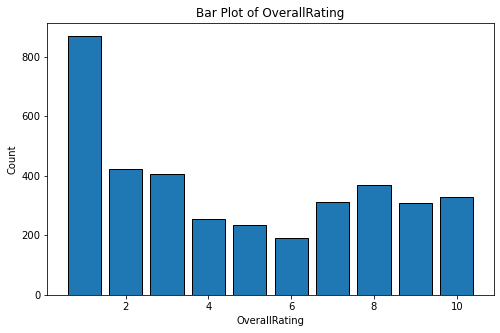

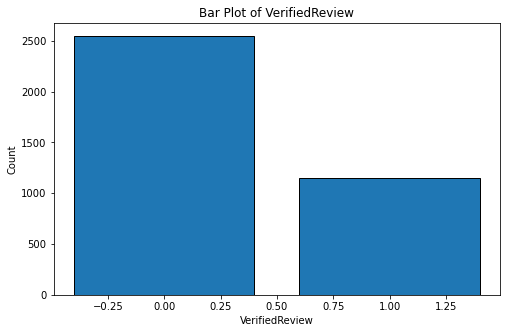

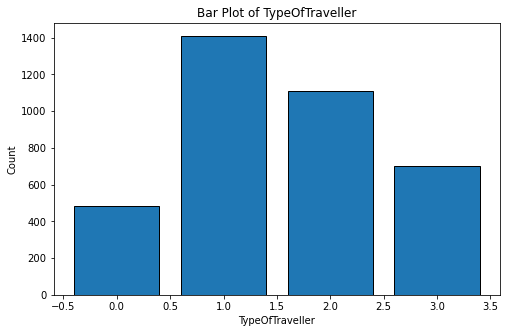

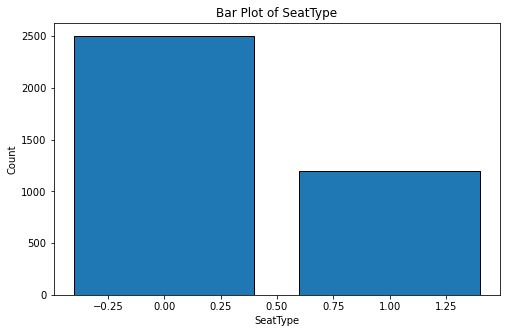

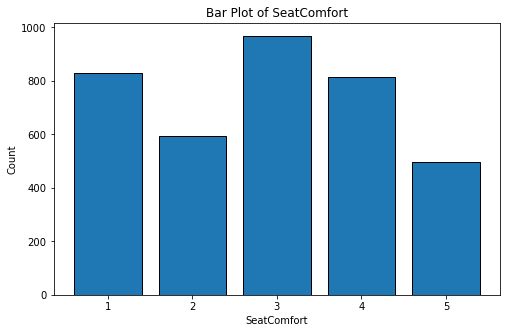

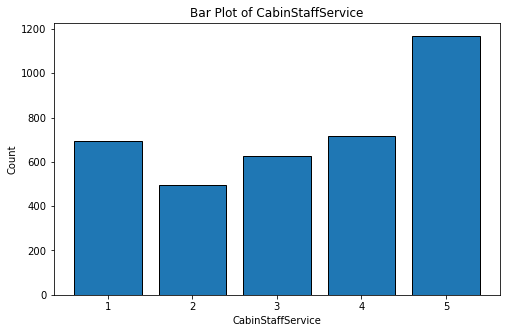

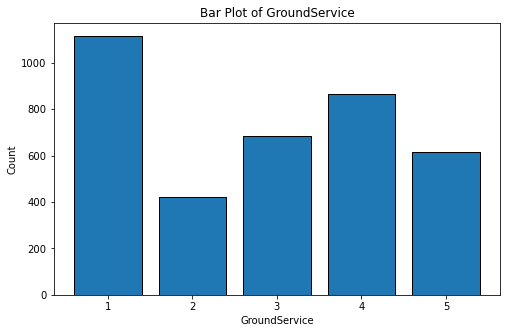

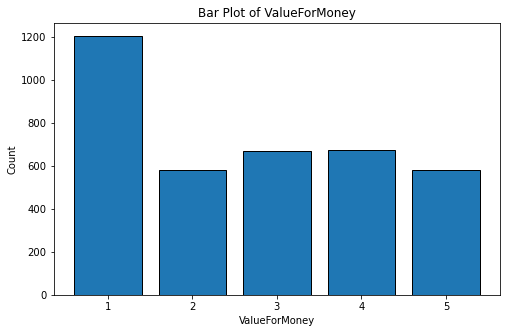

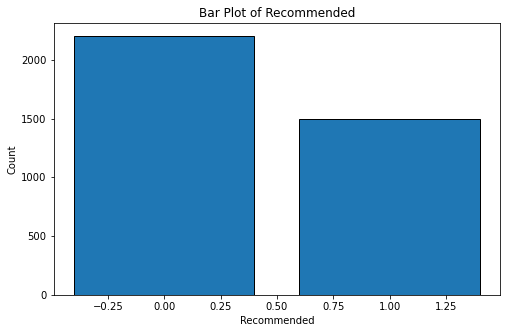

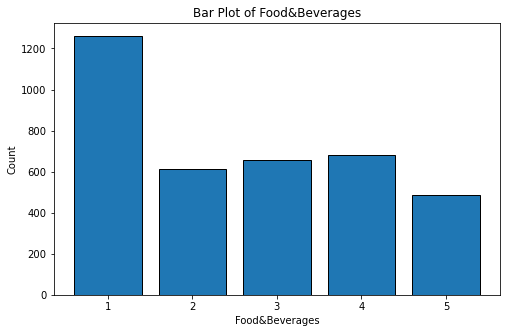

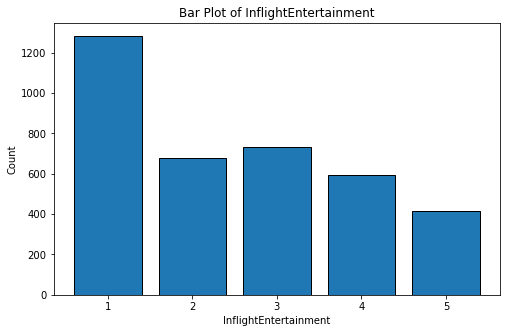

In [12]:
#Data Exploration and Analysis.

import matplotlib.pyplot as plt
columns = airline_df.columns
columns = columns.drop(["ReviewHeader", "Name", "Datetime", "ReviewBody"])

# Bar plots of categorical columns
for column in columns:
    plt.figure(figsize=(8,5))
    counts = airline_df[column].value_counts()
    plt.bar(counts.index, counts, edgecolor='black')
    plt.title(f"Bar Plot of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

In [13]:
airline_df.head()

,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Food&Beverages,InflightEntertainment
0,1.0,"""Service level far worse then Ryanair""",L Keele,19th November 2023,1,4 Hours before takeoff we received a Mail stat...,1.0,0.0,1.0,1.0,1.0,1.0,0,1.0,1.0
1,3.0,"""do not upgrade members based on status""",Austin Jones,19th November 2023,1,I recently had a delay on British Airways from...,3.0,0.0,2.0,3.0,1.0,2.0,0,1.0,2.0
2,8.0,"""Flight was smooth and quick""",M A Collie,16th November 2023,0,"Boarded on time, but it took ages to get to th...",1.0,1.0,3.0,3.0,4.0,3.0,1,4.0,3.0
3,1.0,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,1,"5 days before the flight, we were advised by B...",1.0,0.0,3.0,3.0,1.0,1.0,0,3.0,3.0
4,1.0,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,0,"We traveled to Lisbon for our dream vacation, ...",1.0,0.0,1.0,1.0,1.0,1.0,0,1.0,1.0


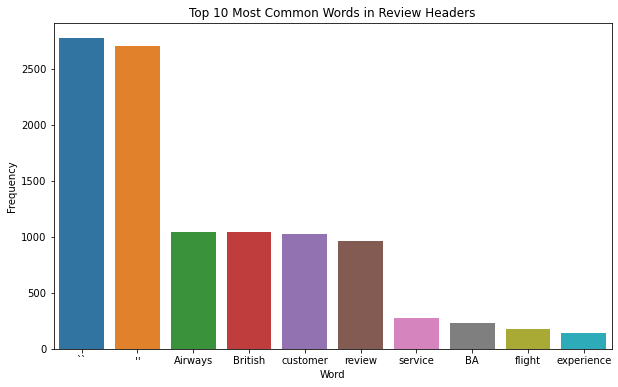

In [14]:
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import seaborn as sns
import nltk

# Combine all review headers into a single string.
all_review_headers = ' '.join(airline_df['ReviewHeader'])

# Tokenize the words.
tokens = word_tokenize(all_review_headers)

# Remove stopwords.
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

# Create a counter for word frequencies.
word_counter = Counter(filtered_tokens)

plt.figure(figsize=(10, 6))
sns.barplot(x=[word[0] for word in word_counter.most_common(10)],
            y=[word[1] for word in word_counter.most_common(10)])
plt.title('Top 10 Most Common Words in Review Headers')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()


In [15]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each review
airline_df['sentiment_score'] = airline_df['ReviewHeader'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Classify sentiment based on scores.
airline_df['sentiment'] = airline_df['sentiment_score'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')

In [16]:
#Data Exploration and Analysis.
airline_df.describe()

,OverallRating,VerifiedReview,TypeOfTraveller,SeatType,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Food&Beverages,InflightEntertainment,sentiment_score
count,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000
mean,4.729262,0.311537,1.547690,0.323696,2.879222,3.313969,2.850581,2.687922,0.404755,2.601189,2.507971,0.004260
std,3.176124,0.463184,0.941654,0.467949,1.340735,1.498032,1.482180,1.471949,0.490911,1.442347,1.391384,0.325766
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,-0.866100
25%,2.000000,0.000000,1.000000,0.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,-0.025800
50%,4.000000,0.000000,1.000000,0.000000,3.000000,4.000000,3.000000,3.000000,0.000000,2.000000,2.000000,0.000000
75%,8.000000,1.000000,2.000000,1.000000,4.000000,5.000000,4.000000,4.000000,1.000000,4.000000,4.000000,0.000000
max,10.000000,1.000000,3.000000,1.000000,5.000000,5.000000,5.000000,5.000000,1.000000,5.000000,5.000000,0.875000


In [17]:
final_df_columns = [col for col in airline_df.columns if airline_df[col].dtype in ['int64', 'float64']]
final_df = airline_df[final_df_columns].copy()
final_df.head()

,OverallRating,VerifiedReview,TypeOfTraveller,SeatType,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Food&Beverages,InflightEntertainment,sentiment_score
0,1.0,1,1.0,0.0,1.0,1.0,1.0,1.0,0,1.0,1.0,-0.4767
1,3.0,1,3.0,0.0,2.0,3.0,1.0,2.0,0,1.0,2.0,0.0000
2,8.0,0,1.0,1.0,3.0,3.0,4.0,3.0,1,4.0,3.0,0.0000
3,1.0,1,1.0,0.0,3.0,3.0,1.0,1.0,0,3.0,3.0,-0.5095
4,1.0,0,1.0,0.0,1.0,1.0,1.0,1.0,0,1.0,1.0,0.0000


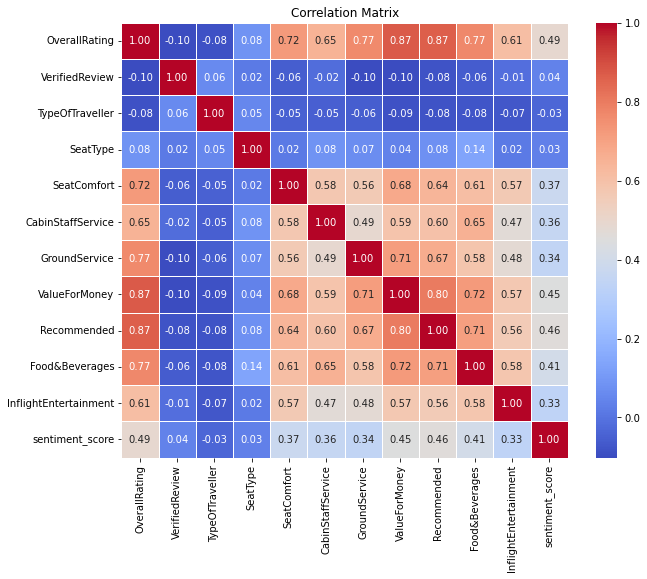

In [18]:
correlation_matrix = final_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

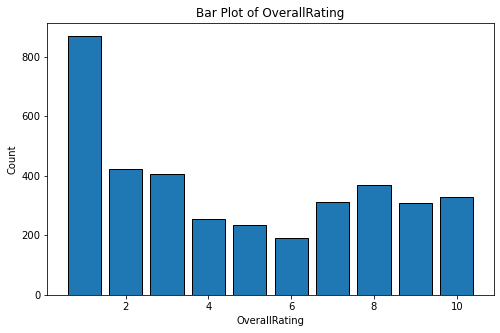

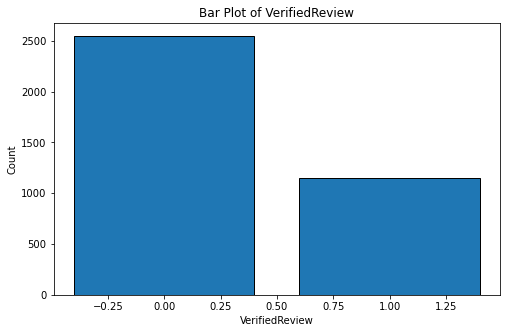

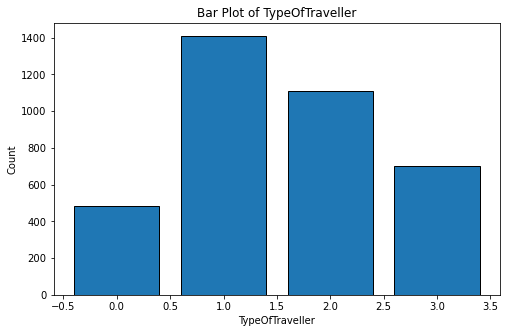

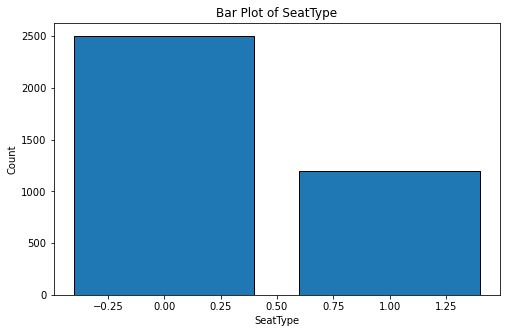

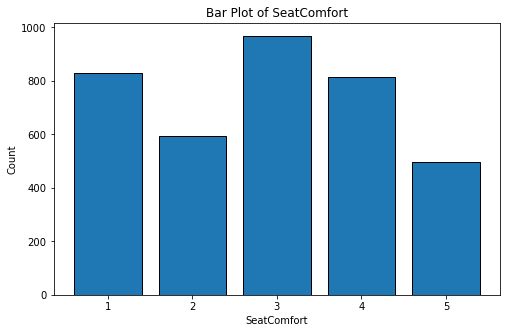

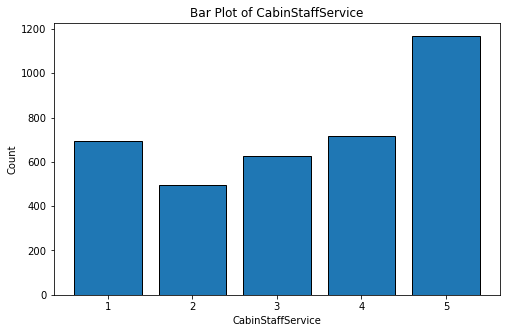

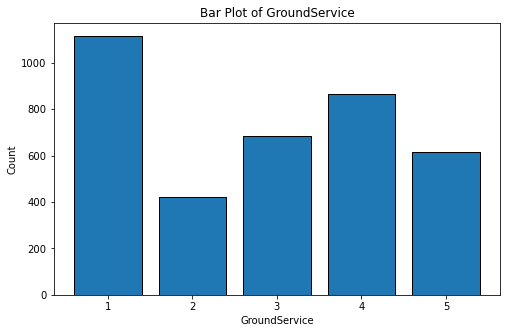

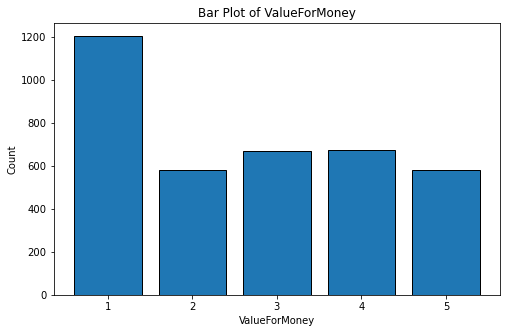

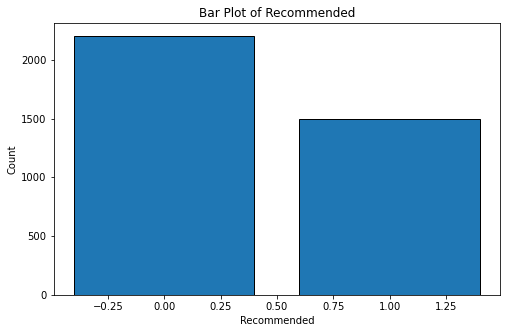

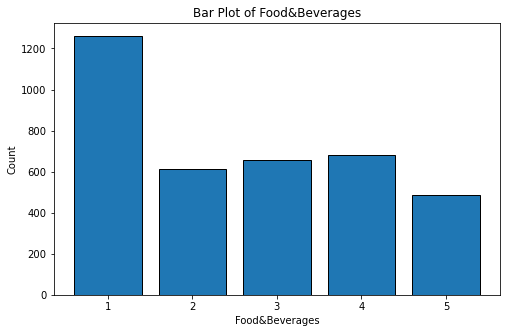

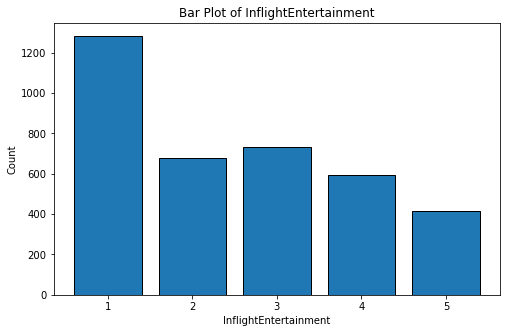

In [19]:
for column in final_df.columns:
    if column == 'sentiment_score':
        continue
    plt.figure(figsize=(8,5))
    counts = airline_df[column].value_counts()
    plt.bar(counts.index, counts, edgecolor='black')
    plt.title(f"Bar Plot of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

In [20]:
# Standardize data for our models.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalizedData = scaler.fit_transform(final_df)

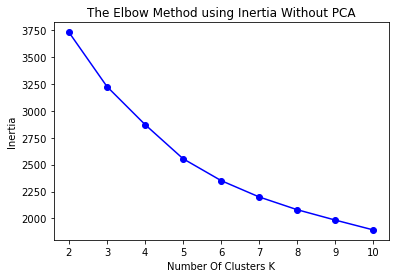

In [21]:
#Elbow method to choose best k.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
inertiaValues = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=40)
    kmeans.fit(normalizedData)
    inertiaValues.append(kmeans.inertia_)

plt.plot(range(2, 11), inertiaValues, 'bo-')
plt.xlabel('Number Of Clusters K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia Without PCA')
plt.show()

In [22]:
columnNameMap = {index:columnName for index, columnName in enumerate(final_df.columns)}
columnNameMap

{0: 'OverallRating',
 1: 'VerifiedReview',
 2: 'TypeOfTraveller',
 3: 'SeatType',
 4: 'SeatComfort',
 5: 'CabinStaffService',
 6: 'GroundService',
 7: 'ValueForMoney',
 8: 'Recommended',
 9: 'Food&Beverages',
 10: 'InflightEntertainment',
 11: 'sentiment_score'}

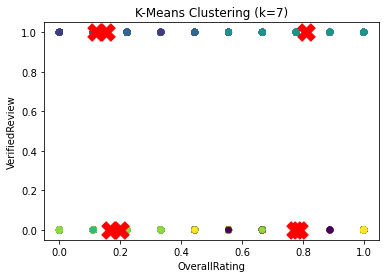

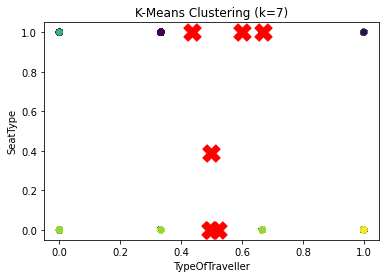

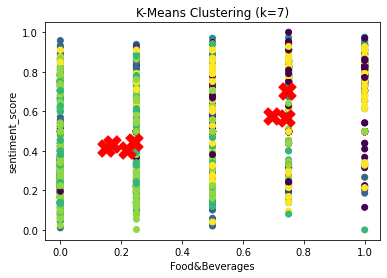

In [23]:
optimal_k = 7
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal.fit(normalizedData)

# Visualize the resulting clusters in 2D.
plt.scatter(normalizedData[:, 0], normalizedData[:, 1], c=kmeans_optimal.labels_, cmap='viridis')
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1], marker='X', s=300, c='red')
plt.xlabel(f"{columnNameMap[0]}")
plt.ylabel(f"{columnNameMap[1]}")
plt.title(f'K-Means Clustering (k={optimal_k})')
plt.show()

plt.scatter(normalizedData[:, 2], normalizedData[:, 3], c=kmeans_optimal.labels_, cmap='viridis')
plt.scatter(kmeans_optimal.cluster_centers_[:, 2], kmeans_optimal.cluster_centers_[:, 3], marker='X', s=300, c='red')
plt.xlabel(f"{columnNameMap[2]}")
plt.ylabel(f"{columnNameMap[3]}")
plt.title(f'K-Means Clustering (k={optimal_k})')
plt.show()

plt.scatter(normalizedData[:, 9], normalizedData[:, 11], c=kmeans_optimal.labels_, cmap='viridis')
plt.scatter(kmeans_optimal.cluster_centers_[:, 9], kmeans_optimal.cluster_centers_[:, 11], marker='X', s=300, c='red')
plt.xlabel(f"{columnNameMap[9]}")
plt.ylabel(f"{columnNameMap[11]}")
plt.title(f'K-Means Clustering (k={optimal_k})')
plt.show()

In [24]:
from sklearn.decomposition import PCA
pca = PCA(12)
components = pca.fit_transform(normalizedData)

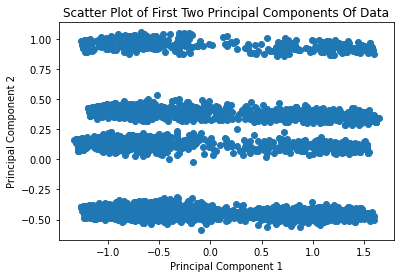

In [25]:
#Visualize components
#There are four clusters.
import matplotlib.pyplot as plt

plt.scatter(components[:, 0], components[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of First Two Principal Components Of Data')
plt.show()

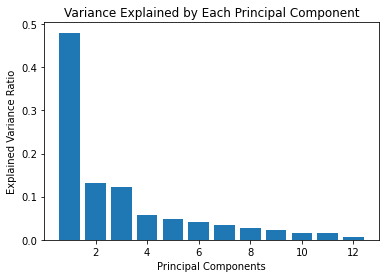

In [26]:
#Visualize variance explained by each component.
explained_variance_ratio = pca.explained_variance_ratio_

plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Variance Explained by Each Principal Component')
plt.show()

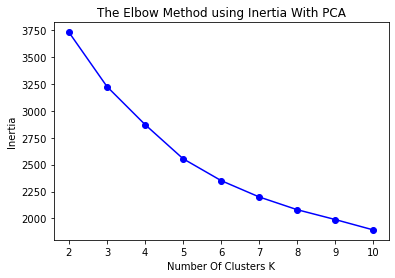

In [27]:
#Elbow method to choose best k.
inertiaValues = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(components)
    inertiaValues.append(kmeans.inertia_)

plt.plot(range(2, 11), inertiaValues, 'bo-')
plt.xlabel('Number Of Clusters K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia With PCA')
plt.show()

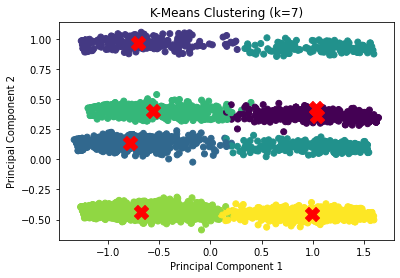

In [28]:
#Visualize first two principal component and clusters.
optimal_k = 7
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal.fit(components)
plt.scatter(components[:, 0], components[:, 1], c=kmeans_optimal.labels_, cmap='viridis')
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1], marker='X', s=200, c='red')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'K-Means Clustering (k={optimal_k})')
plt.show()

In [29]:
from sklearn.model_selection import train_test_split

X = final_df.drop('Recommended', axis=1)
y = final_df['Recommended']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

K-Nearest Neighbors (KNN) Classifier:

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       446
           1       0.93      0.93      0.93       295

    accuracy                           0.94       741
   macro avg       0.94      0.94      0.94       741
weighted avg       0.94      0.94      0.94       741



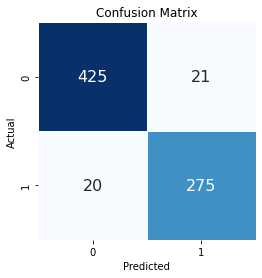

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, KFold

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    plt.figure(figsize=(4, 4))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                annot_kws={"size": 16}, linewidths=0.5, square=True)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

knn_classifier = KNeighborsClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid_knn = {'n_neighbors': [3, 5, 7, 9],
                  'weights': ['uniform', 'distance']}

# Initialize KFold with the specified number of folds
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize GridSearchCV
grid_search_knn = GridSearchCV(knn_classifier, param_grid_knn, cv=kf, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

# Get the best KNN model from the grid search
best_knn_model = grid_search_knn.best_estimator_

# Evaluate the best KNN model on the test set
print("K-Nearest Neighbors (KNN) Classifier:")
evaluate_model(best_knn_model, X_test, y_test)


Logistic Regression:

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       446
           1       0.94      0.93      0.94       295

    accuracy                           0.95       741
   macro avg       0.95      0.95      0.95       741
weighted avg       0.95      0.95      0.95       741



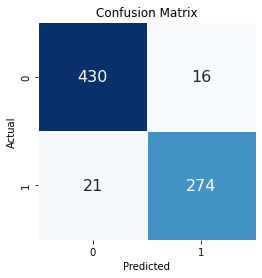

In [31]:
from sklearn.linear_model import LogisticRegression

log_reg_classifier = LogisticRegression()

# Define the parameter grid for hyperparameter tuning
param_grid_log_reg = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                      'penalty': ['l2']}

# Initialize KFold with the specified number of folds
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize GridSearchCV
grid_search_log_reg = GridSearchCV(log_reg_classifier, param_grid_log_reg, cv=kf, scoring='accuracy')
grid_search_log_reg.fit(X_train, y_train)

# Get the best logistic regression model from the grid search
best_log_reg_model = grid_search_log_reg.best_estimator_

# Evaluate the best logistic regression model on the test set
print("\nLogistic Regression:")
evaluate_model(best_log_reg_model, X_test, y_test)

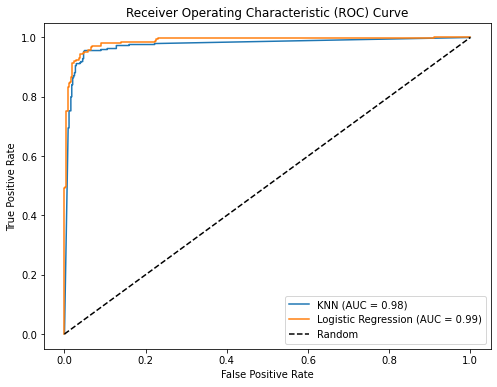

In [32]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Function to plot ROC curve
def plot_roc_curve(model, X, y, label):
    y_prob = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

# Plotting ROC curves for both models
plt.figure(figsize=(8, 6))

# K-Nearest Neighbors (KNN)
plot_roc_curve(best_knn_model, X_test, y_test, 'KNN')

# Logistic Regression
plot_roc_curve(best_log_reg_model, X_test, y_test, 'Logistic Regression')

# Plotting the diagonal line representing random chance
plt.plot([0, 1], [0, 1], 'k--', label='Random')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

plt.show()

In [33]:
#We used KNN classifier, since our dataset is small and distance between points aren't too much.
#We used logistic regression, since we need to classify binary variable which can take two values.
#Logistic regression has slightly better performance compared to KNN classifier, because area under curve score for logistic regression is greater than KNN classifiers.
#We observe high rates for precision, recall and accuracy for both KNN classifier and logistic regression classifier.